Car brand classification project using transfer learning technique ResNet50 architecture.

In [7]:
#Import libraries
import tensorflow
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 #Transfer learning technique
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

print(tensorflow.__version__)

2.8.2


In [8]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/Car classification datasets/Train'
valid_path='/content/drive/MyDrive/Car classification datasets/Test'

In [9]:
#Import resnet 50 library as shown below and add preprocessing layer to the front of Resnet 50
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [11]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [12]:
#Dont train existing weights
for layer in resnet.layers:
  layer.trainable=False

In [17]:
#Useful to get no of output classes
folders=glob('/content/drive/MyDrive/Car classification datasets/Train/*')
folders

['/content/drive/MyDrive/Car classification datasets/Train/audi',
 '/content/drive/MyDrive/Car classification datasets/Train/lamborghini',
 '/content/drive/MyDrive/Car classification datasets/Train/mercedes']

In [18]:
#Flatten our layers
x=Flatten()(resnet.output)

In [23]:
prediction=Dense(len(folders),activation='softmax')(x)
#Create a model object
model=Model(inputs=resnet.input,outputs=prediction)

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [25]:
#Tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
#Use the image Data generator to import the images from dataset
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255) #No need to augment for test data

In [28]:
#To Make sure the input size of image is same as defined earlier
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Car classification datasets/Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.


In [29]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Car classification datasets/Test',target_size=(224,224),batch_size=32,class_mode="categorical")

Found 58 images belonging to 3 classes.


In [31]:
#fit the model
r=model.fit_generator(training_set,validation_data=test_set,epochs=50,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 59s 45s/step - loss: 7.7834 - accuracy: 0.2656 - val_loss: 4.5429 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 704ms/step - loss: 7.1390 - accuracy: 0.3750 - val_loss: 5.1183 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 714ms/step - loss: 6.8951 - accuracy: 0.3906 - val_loss: 11.3575 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 722ms/step - loss: 7.9770 - accuracy: 0.3125 - val_loss: 3.3218 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 1s 720ms/step - loss: 3.2552 - accuracy: 0.4062 - val_loss: 4.8726 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 711ms/step - loss: 5.2313 - accuracy: 0.4844 - val_loss: 4.1851 - val_accuracy: 0.5517
Epoch 7/50
2/2 [==============================] - 1s 706ms/step - loss: 6.5670 - accuracy: 0.4375 - val_loss: 3.4239 - val_accuracy: 0.5690
Epoch 8/50
2/2 [====

In [33]:
r.history

{'accuracy': [0.265625,
  0.375,
  0.390625,
  0.3125,
  0.40625,
  0.484375,
  0.4375,
  0.515625,
  0.5,
  0.421875,
  0.53125,
  0.546875,
  0.546875,
  0.65625,
  0.609375,
  0.5,
  0.71875,
  0.5625,
  0.65625,
  0.75,
  0.65625,
  0.8125,
  0.75,
  0.8125,
  0.796875,
  0.765625,
  0.8125,
  0.8125,
  0.796875,
  0.796875,
  0.828125,
  0.875,
  0.890625,
  0.90625,
  0.875,
  0.859375,
  0.90625,
  0.828125,
  0.859375,
  0.875,
  0.890625,
  0.90625,
  0.875,
  0.9375,
  0.921875,
  0.921875,
  0.9375,
  0.953125,
  0.9375,
  0.90625],
 'loss': [7.783351898193359,
  7.1389689445495605,
  6.895058631896973,
  7.977018356323242,
  3.2551732063293457,
  5.2313337326049805,
  6.566997528076172,
  4.360893249511719,
  1.6242952346801758,
  3.631345510482788,
  1.674243688583374,
  1.733642816543579,
  2.5096988677978516,
  1.368507981300354,
  0.9083496332168579,
  1.4264650344848633,
  0.7937436103820801,
  1.442226529121399,
  0.9029178619384766,
  0.6524025201797485,
  0.98638033

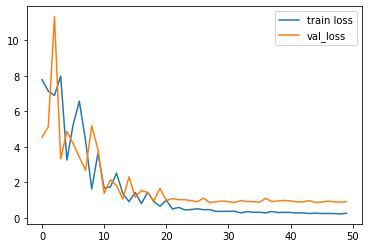

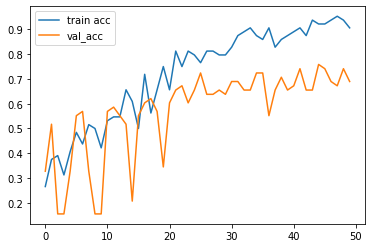

<Figure size 432x288 with 0 Axes>

In [35]:
#Plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [36]:
#Save the model as h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [37]:
#Prediction for test data
y_pred=model.predict(test_set)
y_pred

array([[9.21192169e-01, 2.81814747e-02, 5.06263264e-02],
       [7.11236969e-02, 4.29560661e-01, 4.99315649e-01],
       [5.37975952e-02, 4.19111818e-01, 5.27090549e-01],
       [5.63293323e-02, 7.20465243e-01, 2.23205477e-01],
       [9.92102642e-03, 9.12138045e-01, 7.79409856e-02],
       [7.55802751e-01, 5.82046481e-03, 2.38376811e-01],
       [1.48110662e-03, 9.63747442e-01, 3.47714573e-02],
       [1.46964230e-02, 9.43510115e-01, 4.17934284e-02],
       [2.85319593e-02, 7.11640418e-01, 2.59827703e-01],
       [4.07129526e-02, 8.55921745e-01, 1.03365384e-01],
       [2.50122175e-02, 9.57070217e-02, 8.79280746e-01],
       [2.62391698e-02, 3.97869527e-01, 5.75891316e-01],
       [1.25766903e-01, 7.75761530e-02, 7.96656966e-01],
       [2.11820342e-02, 8.70668888e-01, 1.08149081e-01],
       [6.53230965e-01, 1.31587625e-01, 2.15181410e-01],
       [1.54467538e-01, 5.48493743e-01, 2.97038794e-01],
       [2.34546745e-03, 9.83139813e-01, 1.45146437e-02],
       [1.23199798e-01, 3.15526

In [39]:
#Taking max position from predictions
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2,
       1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1])

Loading and predicting seperate image

In [67]:
img=image.load_img('/content/drive/MyDrive/Car classification datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [68]:
x=image.img_to_array(img)
x.shape

(224, 224, 3)

In [69]:
x=x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [70]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [71]:
model.predict(img_data)

array([[0.0076934 , 0.5527525 , 0.43955407]], dtype=float32)

In [72]:
a=np.argmax(model.predict(img_data),axis=1)

In [73]:
if a[0]==0:
  print("The model given is Audi")
elif a[0]==1:
  print("The model given is Lamborghini")
elif a[0]==2:
  print("The model given is Mercedes")
else:
  print("Image not among the list of trained models")

The model given is Lamborghini


Hence we got a decent accuracy using Resnet architecture. This accuracy can be improved by adding more images to train set and test set